# Data Exploration

## INFO about dataset
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [18]:
df1 = pd.read_csv('./data/data-raw/train.csv')
doc_num = len(df1)

print('Number of comments: {}'.format(doc_num))
df1.head()

Number of comments: 159571


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Join toxic	and severe_toxic

In [19]:
df1['toxic'] = df1['toxic'] | df1['severe_toxic']
df1.drop('severe_toxic', axis=1, inplace=True)

## Number of comments, celectivity vs categories
Selectivity - the proportion of documents to which category(predicate) applies.

Text(0.5,0,'Categories')

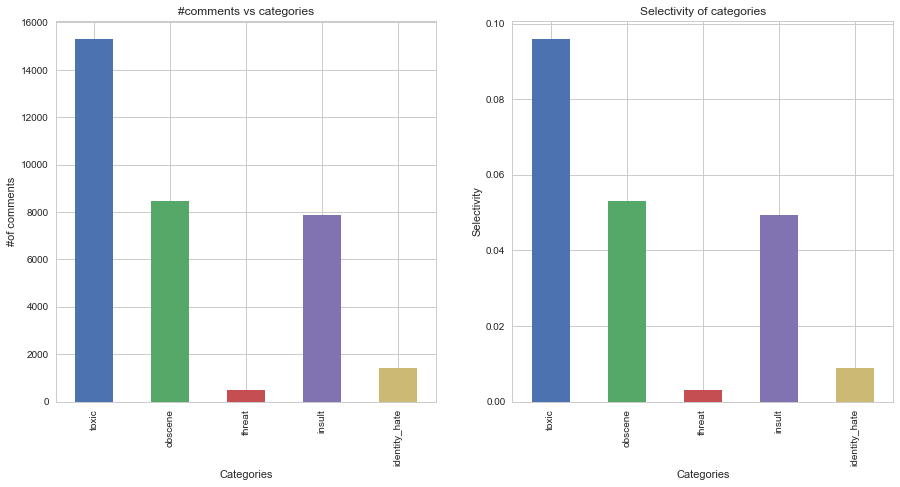

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# plot num of abstracts
df1[df1.columns[2:]].sum().plot.bar(ax=axes[0], title='#comments vs categories')
axes[0].set_ylabel('#of comments')
axes[0].set_xlabel('Categories')

# plot selectivity
s = df1[df1.columns[2:]].sum() / doc_num
s.plot.bar(ax=axes[1], title='Selectivity of categories')
axes[1].set_ylabel('Selectivity')
axes[1].set_xlabel('Categories')

## Find comments that match N categories at the same time

In [22]:
categories = df1.columns[2:]
category_docs = {}
for c in categories:
    category_docs[c] = set(df1['id'].loc[df1[c] == 1].values)
    
num_categories = len(categories)
two_categories_docs = np.zeros((num_categories, num_categories))
for ind_c1, c1 in enumerate(categories):
    for ind_c2, c2 in enumerate(categories):
        two_categories_docs[ind_c1, ind_c2] = len(category_docs[c1] & category_docs[c2])    

### Plot heatmap for 2 categories

In [23]:
df2 = pd.DataFrame(two_categories_docs, index=categories, columns=categories)

# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.01, ax=ax)

### Bar chart of number, proportion of abstracts  that describe 2 categories

In [24]:
df3= df2.unstack().sort_values(ascending=False).drop_duplicates()
indexes2 = df3.index.values.tolist()
indexes2_unique = []
for i in indexes2:
    if i[0] != i[1]:
        indexes2_unique.append(i)

Text(0.5,0,'Categories')

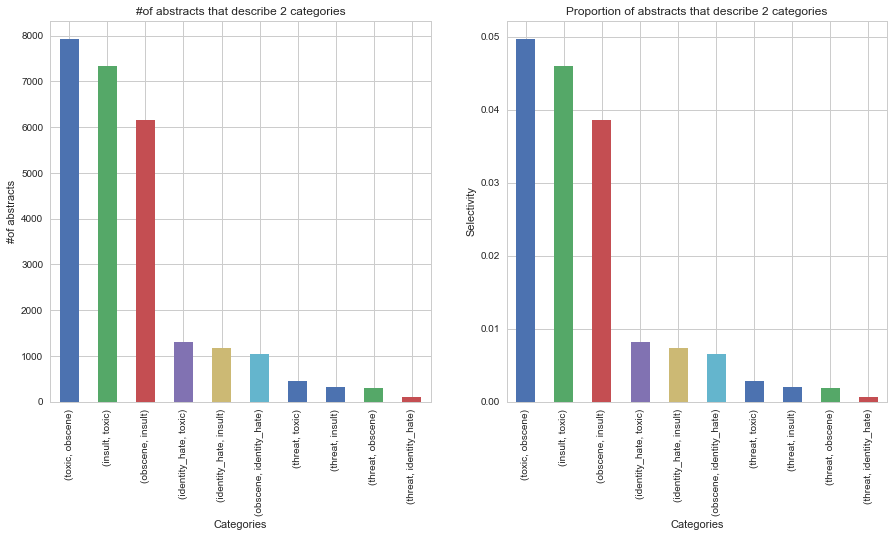

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# plot num of abstracts
df3.loc[indexes2_unique][:10].plot.bar(ax=axes[0], title='#of abstracts that describe 2 categories')
axes[0].set_ylabel('#of abstracts')
axes[0].set_xlabel('Categories')

# plot selectivity
s = df3.loc[indexes2_unique][:10] / doc_num
s.plot.bar(ax=axes[1], title='Proportion of abstracts that describe 2 categories')
axes[1].set_ylabel('Selectivity')
axes[1].set_xlabel('Categories')


### Bar chart of number of documents  that describe 3 categories

In [26]:
indexes3_unrolled = set()
for i in indexes2_unique:    
    indexes3_unrolled.add(i[0])
    indexes3_unrolled.add(i[1])

import itertools
indexes3 = list(itertools.combinations(indexes3_unrolled, 3))
three_categories_docs = []
for c1, c2, c3 in indexes3:
    three_categories_docs.append(len(category_docs[c1] & category_docs[c2] & category_docs[c3]))

Text(0.5,1,'#of abstracts that describe 3 categories')

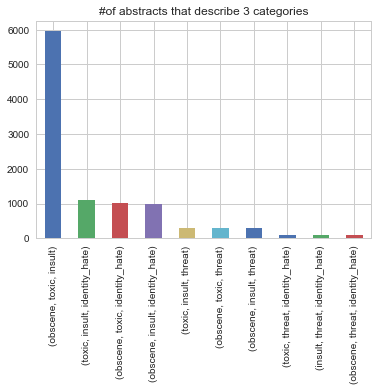

In [27]:
pd.Series(three_categories_docs, indexes3).sort_values(ascending=False)[:10].plot.bar().set_title('#of abstracts that describe 3 categories')

In [28]:
print('Selectivity of  Toxic^Obscene^Insult = {}'.format(6000/159571))

Selectivity of  Toxic^Obscene^Insult = 0.03760081719109362
